# Lab: Illusions

In the following labs we are going to look at visualisations. We will consider 3 'illusions' then misleading visualisations including bar plots, line plots and choropleths.

For this lab we will be using `Altair` - a plotting library which has more flexability than seaborn. It is a little more complex and examples can be found [here](https://altair-viz.github.io/gallery/). `Altair` is not installed by default in Anaconda, but it has been included in the virtual environment for this module. If you are using the course's virtual environment, this should be installed for you the first time you set up your environment for the module. Refer to @sec-setup for instructions on how to set up your environment.



## Clustering illusion

You can find details of the clustering illusion [here](https://en.wikipedia.org/wiki/Clustering_illusion), [here](https://www.sciencedirect.com/science/article/abs/pii/004269899090160M), and [here](https://www.sciencedirect.com/science/article/pii/S0042698906000927).

The illusion suggests you should automatically try and see clusters in random data.

/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

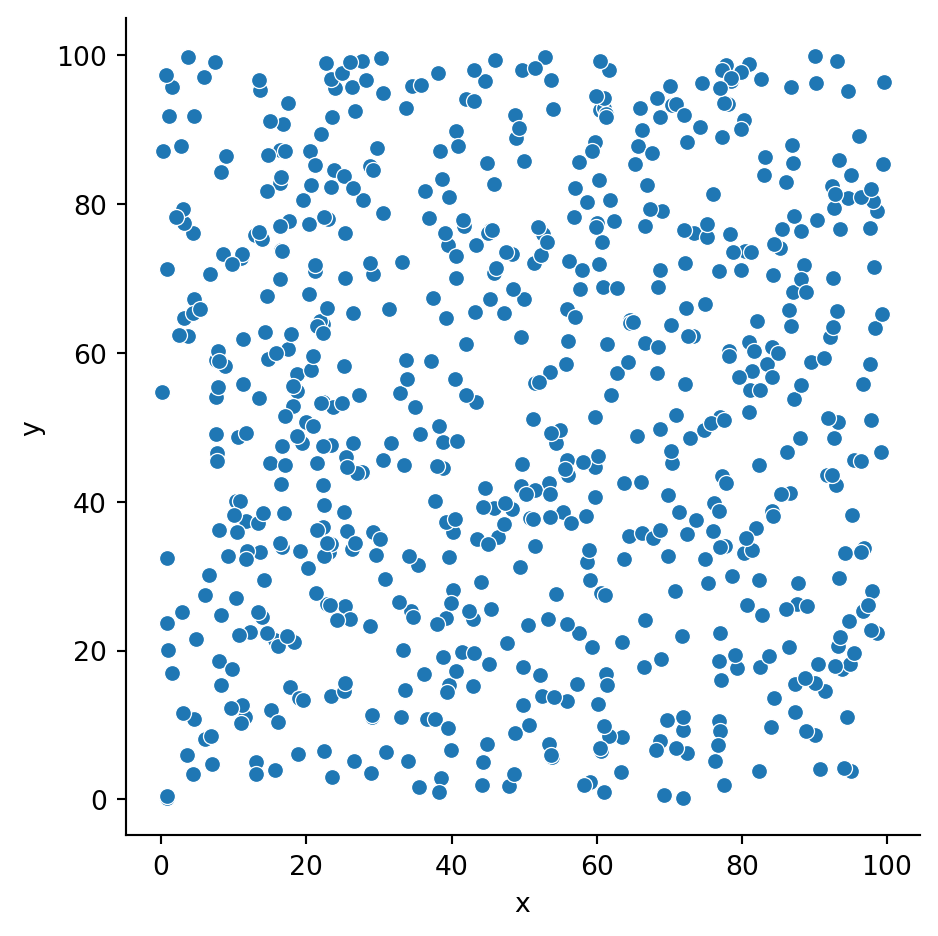

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import altair as alt

n = 700

d = {'x': np.random.uniform(0, 100, n), 'y': np.random.uniform(0, 100, n)}
df = pd.DataFrame(d)

sns.relplot(data = df, x = 'x', y = 'y')

The syntax for building this type in Altair is pretty straight forward.

In [2]:
alt.Chart(df).mark_circle(size=5).encode(
    x='x',
    y='y')

alt.Chart(...)

To remove those pesky lines we need to specify we want an X and Y axis without grid lines.

In [3]:
alt.Chart(df).mark_circle(size=5).encode(
    alt.X('x', axis=alt.Axis(grid=False)),
    alt.Y('y', axis=alt.Axis(grid=False)))

alt.Chart(...)

We will do a lot of altering axis and colors in altair. We do this by specifying alt.axistype and then passing various options.

Do you see any clustering the in the above plots? What about if we give names to the different columns?

In [4]:
alt.Chart(df).mark_circle(size=5).encode(
    alt.X('x', axis=alt.Axis(grid=False, title='Height')),
    alt.Y('y', axis=alt.Axis(grid=False, title='Weight')))

alt.Chart(...)

Another example of the clustering illusion is the idea of 'streaks'. That we see a pattern from a small sample and extrapolate out.

What do you expect the next dice role to be?

In [5]:
n_rolls = 10
d = {'round': np.linspace(1,n_rolls,n_rolls), 'roll': np.random.randint(1,6,n_rolls)}
df_dice = pd.DataFrame(d)
df_dice

,round,roll
0,1.0,4
1,2.0,4
2,3.0,5
3,4.0,3
4,5.0,1
5,6.0,4
6,7.0,2
7,8.0,4
8,9.0,2
9,10.0,1


/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='round', ylabel='roll'>

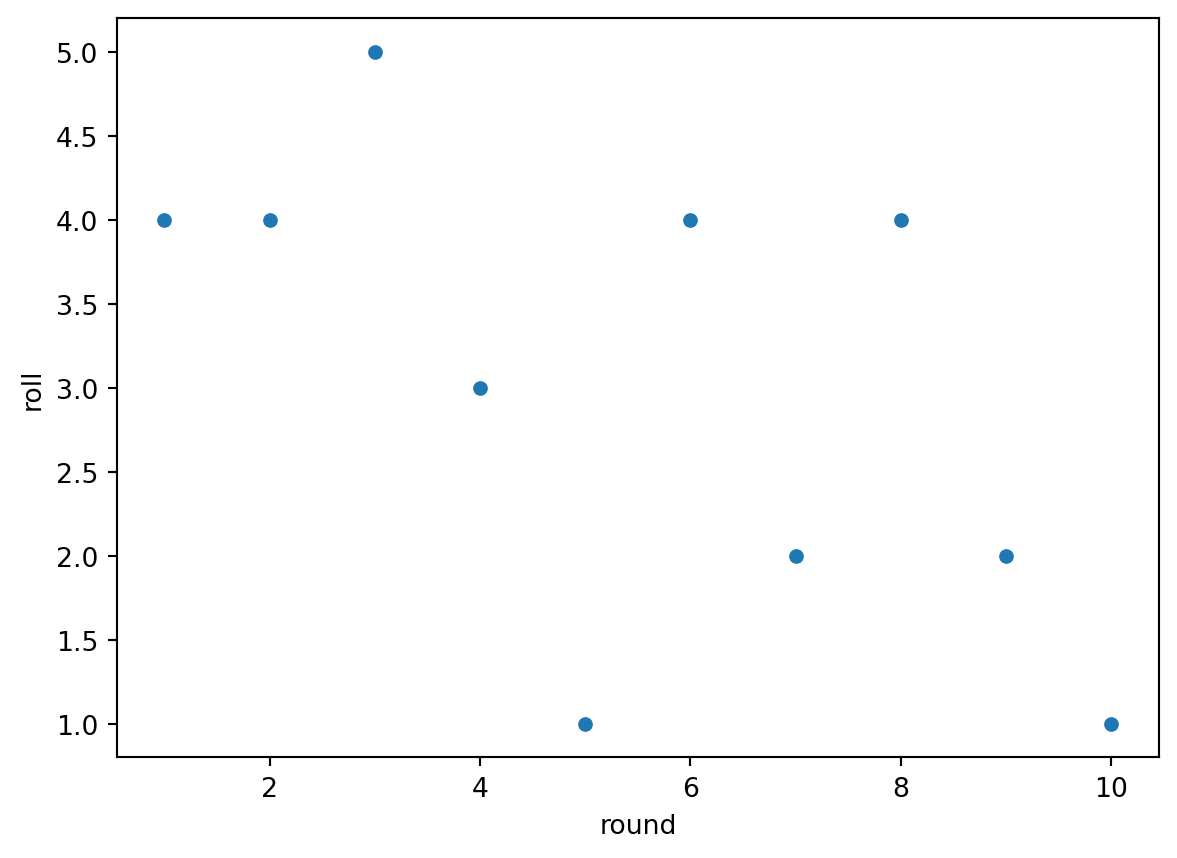

In [6]:
sns.scatterplot(data=df_dice, x='round', y='roll')

In [7]:
alt.Chart(df_dice).mark_circle(size=20).encode(
    alt.X('round', axis=alt.Axis(grid=False)),
    alt.Y('roll', axis=alt.Axis(grid=False)))

alt.Chart(...)

Each number on the dice will occur the same number of times. Any patterns you see are due to extrapolating based on a small sample. We can check that though by rolling the 'dice' 1,000,000 times.

In [8]:
n_rolls = 1000000
d = {'round': np.linspace(1,n_rolls,n_rolls), 'roll': np.random.randint(1,6,n_rolls)}
df_dice_many = pd.DataFrame(d)

df_dice_many.groupby('roll').count()

,round
roll,
1,199200
2,200119
3,200534
4,200282
5,199865


## Weber-Fechner Law



> 'The Weber-Fechner Law is a famous finding of early psychophysics indicating that differences between stimuli are detected on a logarithmic scale. It takes more additional millimeters of radius to discern two larger circles than two smaller circles. This type of bias is probably one of the most researched biases in visualization research.' 
> 
> -- [@calero_valdez_studying_2018]

Let us see if we can create a plot to demonstrate it.

We will load in the car crashes dataset from seaborn. Documentation of the data is [here](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset).

In [9]:
df_crashes = sns.load_dataset('car_crashes')
df_crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


To illustrate this 'illusion' we will plot the percentage of drivers speeding, percentage of alcohol impaired and set the size of the point equal to the percentage of drivers not previously involves in any accident. Each point is an american state.

Are there any relationships or patterns in the data?

/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='speeding', ylabel='alcohol'>

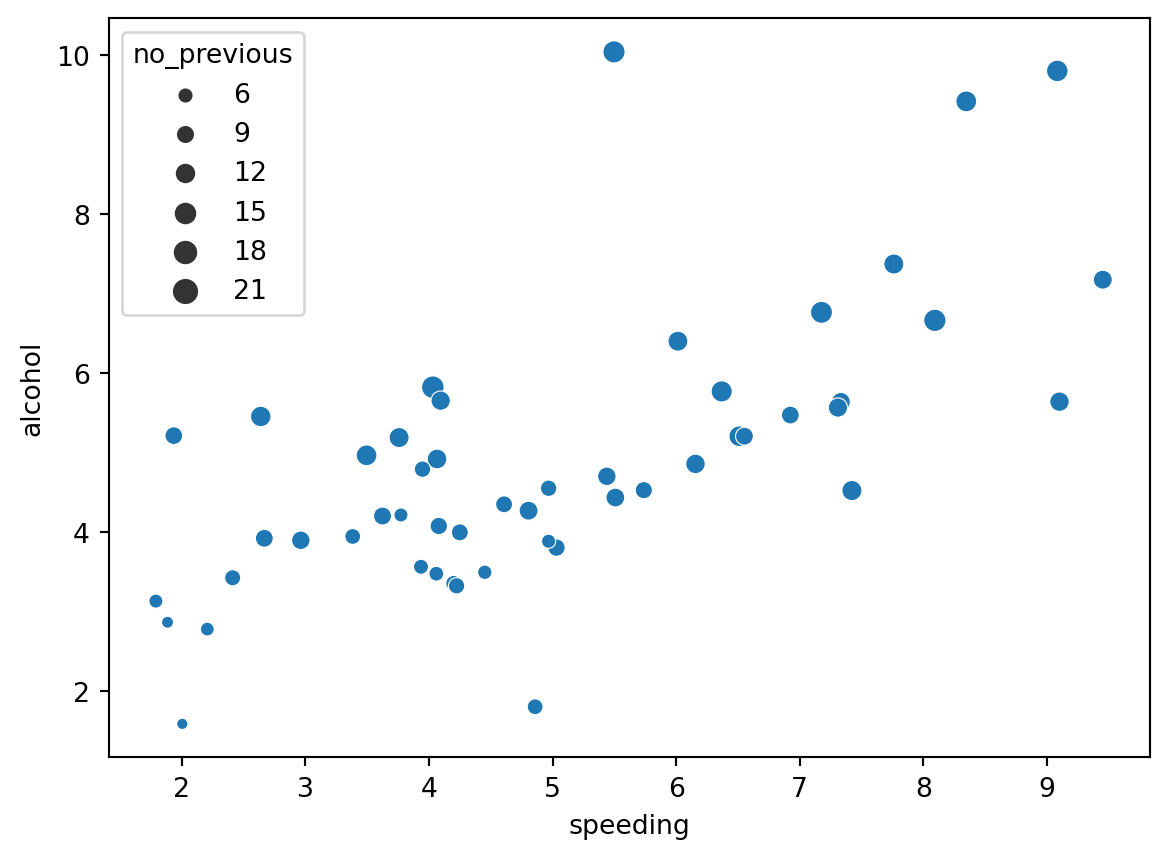

In [10]:
sns.scatterplot(data=df_crashes, x='speeding', y='alcohol', size='no_previous')

Is it easier to distinguish the different sizes in the below plot?

/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='speeding', ylabel='alcohol'>

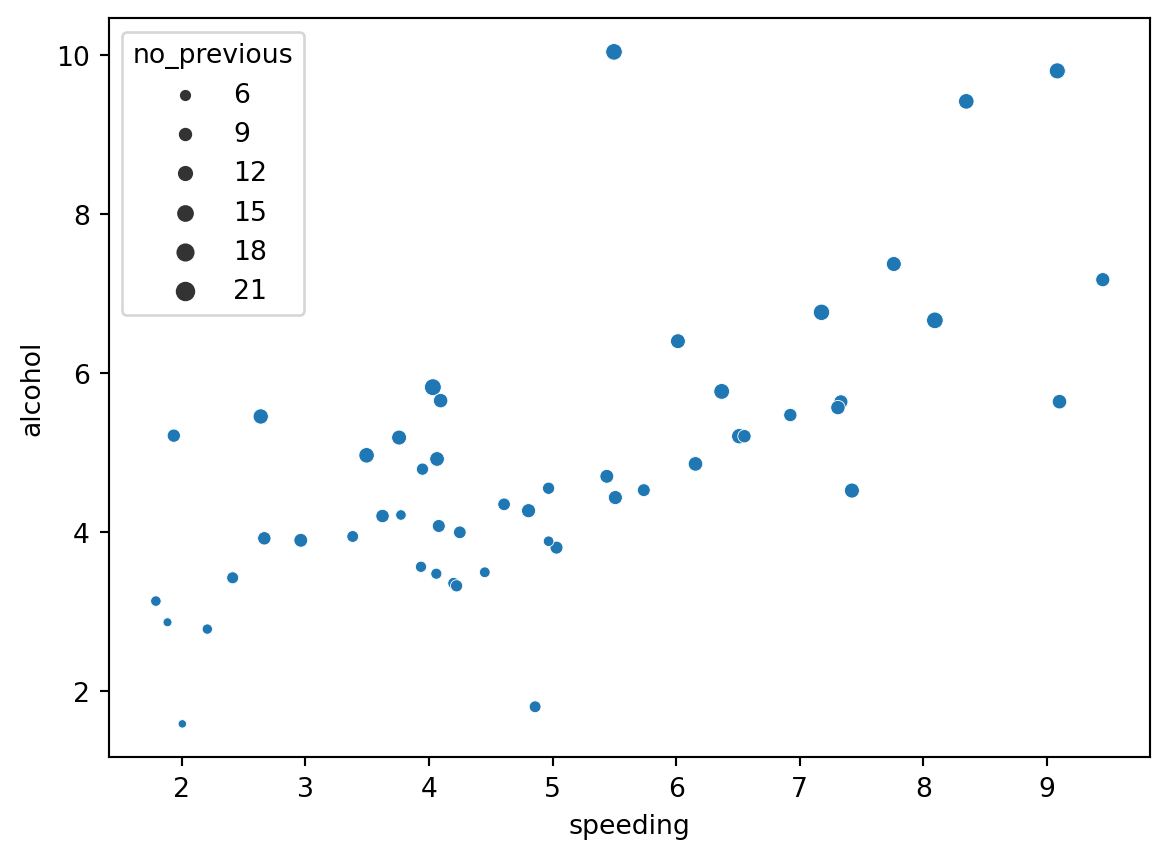

In [11]:
sns.scatterplot(data=df_crashes,
                x='speeding',
                y='alcohol',
                size='no_previous',
                sizes=(10,40))

How about this one?

/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='speeding', ylabel='alcohol'>

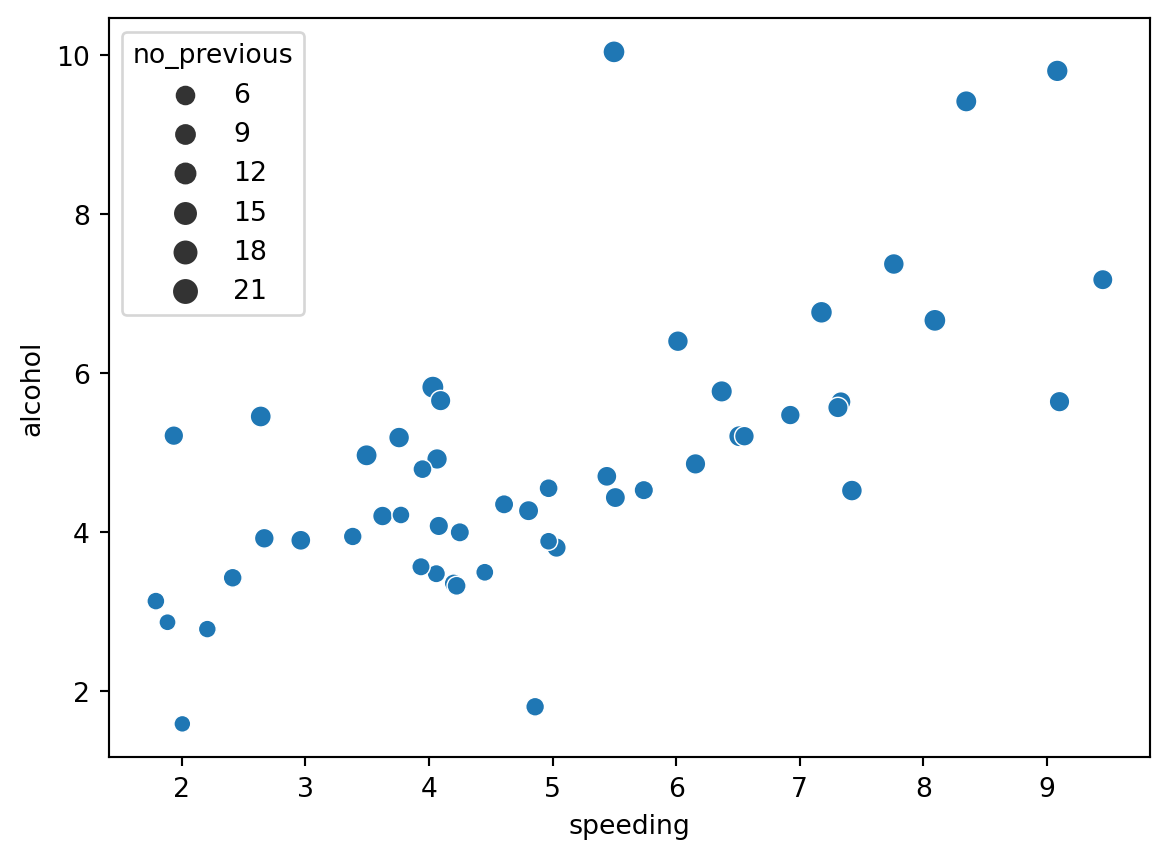

In [12]:
sns.scatterplot(data=df_crashes,
                x='speeding',
                y='alcohol',
                size='no_previous',
                sizes=(40,70))

The values are the same. We have just changed the range of sizes.

We can do much the same in altair.

In [13]:
alt.Chart(df_crashes).mark_circle().encode(
    x='speeding',
    y='alcohol',
    size='no_previous'
)

/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/altair/utils/core.py:410: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [14]:
alt.Chart(df_crashes).mark_circle().encode(
    x='speeding',
    y='alcohol',
    size = alt.Size('no_previous', scale=alt.Scale(range=[10,40]))
)

/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/altair/utils/core.py:410: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [15]:
alt.Chart(df_crashes).mark_circle().encode(
    x='speeding',
    y='alcohol',
    size = alt.Size('no_previous', scale=alt.Scale(range=[40,70]))
)

/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/altair/utils/core.py:410: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

Have you come across any other illusions? If so, try and plot them out. I sometimes find it easier to understand these things through creating simple illustrations of my own.